<a href="https://colab.research.google.com/github/shreesha2304/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# **OBJECTIVE OF THE PROJECT**


*   The main aim of this project is to predct the customer that might default in the coming month. 
*   At this point of time it is important to understand what does 'default' mean. Whenever a customer , due to any reason, fails to pay the minimum amount within a predetermined period of time, a payment default occurs. If a customer defaults, the authorities asks the reasons and if they are not satisfied, they will inform to the credit buraeus.

*   In this project, we have built an ML model which can predict the customer default beforehand so that we can take appropriate steps to invite minimum default.









First of all, let's import all the libraries required.

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pprint import pprint
import joblib
import imblearn

from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
 #upgrading the module so as to avoid error while reading excel file
 !pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 5.4 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [3]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [96]:
# reading the datatset
df = pd.read_excel('/content/drive/My Drive/AlmaBetter/Capstone Project 3/default of credit card clients.xls')

In [5]:
# checking the no of columns and rows in the datatset
df.shape

(30001, 25)

As we can see, the dataset consists of 30001 rows and 25 columns.

In [ ]:
# a glance through the first five rows
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
# a glance through the last 5 rows
df.tail()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [ ]:
# Let's check the names of the columns
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

The first row of the dataset contains the names of the columns. It is better to replace those confusing column names with the names in the first row.

In [97]:
# changing the columns names
df.set_axis(df.iloc[0], axis='columns', inplace=True)

In [98]:
df.drop(labels=0, axis=0, inplace=True)

In [ ]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Let's get some basic information about the dataset.

In [99]:
#basic structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

All the columns in this dataset are of object type. 

# **Checking missing values**
Missing values are due to the data corruption or failure to capture the data. These values have to be treated in the initial stages since the ML modles do not accept missing values, resulting in an error.

In [7]:
# checking for null values
df.isnull().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Fortunately there are no missing values and therefore, we need not handle them.

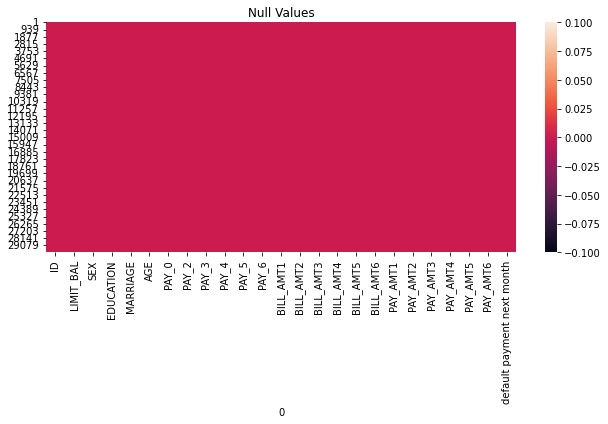

In [8]:
#plotting a graph to understand well
plt.figure(figsize=(9,6))
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.tight_layout()

# **Checking duplicated values**
These are redundant entries. These might be due to data entry errors or fault in data collection methods. If we do not remove these redundant values, it unnecessarily increases the size of the data. Moreover, the time taken to process the data significantly drops.

In [ ]:
# Checking for duplicated entries
df.duplicated().sum()

0

This dataset doesn't contain any duplicated entries.

In [ ]:
#checking the statistical values of features in the dataset
df.describe().T

,count,unique,top,freq
0,,,,
ID,30000,30000,1,1
LIMIT_BAL,30000,81,50000,3365
SEX,30000,2,2,18112
EDUCATION,30000,7,2,14030
MARRIAGE,30000,4,2,15964
AGE,30000,56,29,1605
PAY_0,30000,11,0,14737
PAY_2,30000,11,0,15730
PAY_3,30000,11,0,15764


For clear understading, let's further change the names of the columns with more appropriate ones.

In [100]:
# renaming the columns
df.rename(columns={'LIMIT_BAL': 'limit_bal',
                   'SEX': 'sex',
                   'EDUCATION' : 'education',
                   'MARRIAGE' : 'marital_status',
                   'AGE' : 'age',
                   'PAY_0': 'ps_sept',
                   'PAY_2': 'ps_aug',
                   'PAY_3': 'ps_jul',
                   'PAY_4': 'ps_jun',
                   'PAY_5': 'ps_may',
                   'PAY_6': 'ps_apr',
                   'BILL_AMT1': 'bill_sept',
                   'BILL_AMT2': 'bill_aug',
                   'BILL_AMT3': 'bill_jul',
                   'BILL_AMT4': 'bill_jun',
                   'BILL_AMT5': 'bill_may',
                   'BILL_AMT6': 'bill_apr',
                   'PAY_AMT1': 'pa_sept',
                   'PAY_AMT2': 'pa_aug',
                   'PAY_AMT3': 'pa_jul',
                   'PAY_AMT4': 'pa_jun',
                   'PAY_AMT5': 'pa_may',
                   'PAY_AMT6': 'pa_apr',
                   'default payment next month':'defaulted'}, inplace=True)

In [101]:
# setting the index to ID
df.set_index('ID', inplace = True)

In [ ]:
df

,limit_bal,sex,education,marital_status,age,ps_sept,ps_aug,ps_jul,ps_jun,ps_may,...,bill_jun,bill_may,bill_apr,pa_sept,pa_aug,pa_jul,pa_jun,pa_may,pa_apr,defaulted
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [10]:
#let's segregate the numerical features
numeric_features=['limit_bal', 'age',
       'ps_sept', 'ps_aug', 'ps_jul', 'ps_jun', 'ps_may', 'ps_apr',
       'bill_sept', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr',
       'pa_sept', 'pa_aug', 'pa_jul', 'pa_jun', 'pa_may', 'pa_apr']
       

It is important to find the distribution of these numeric features and find out whether there is any anomaly in the data.

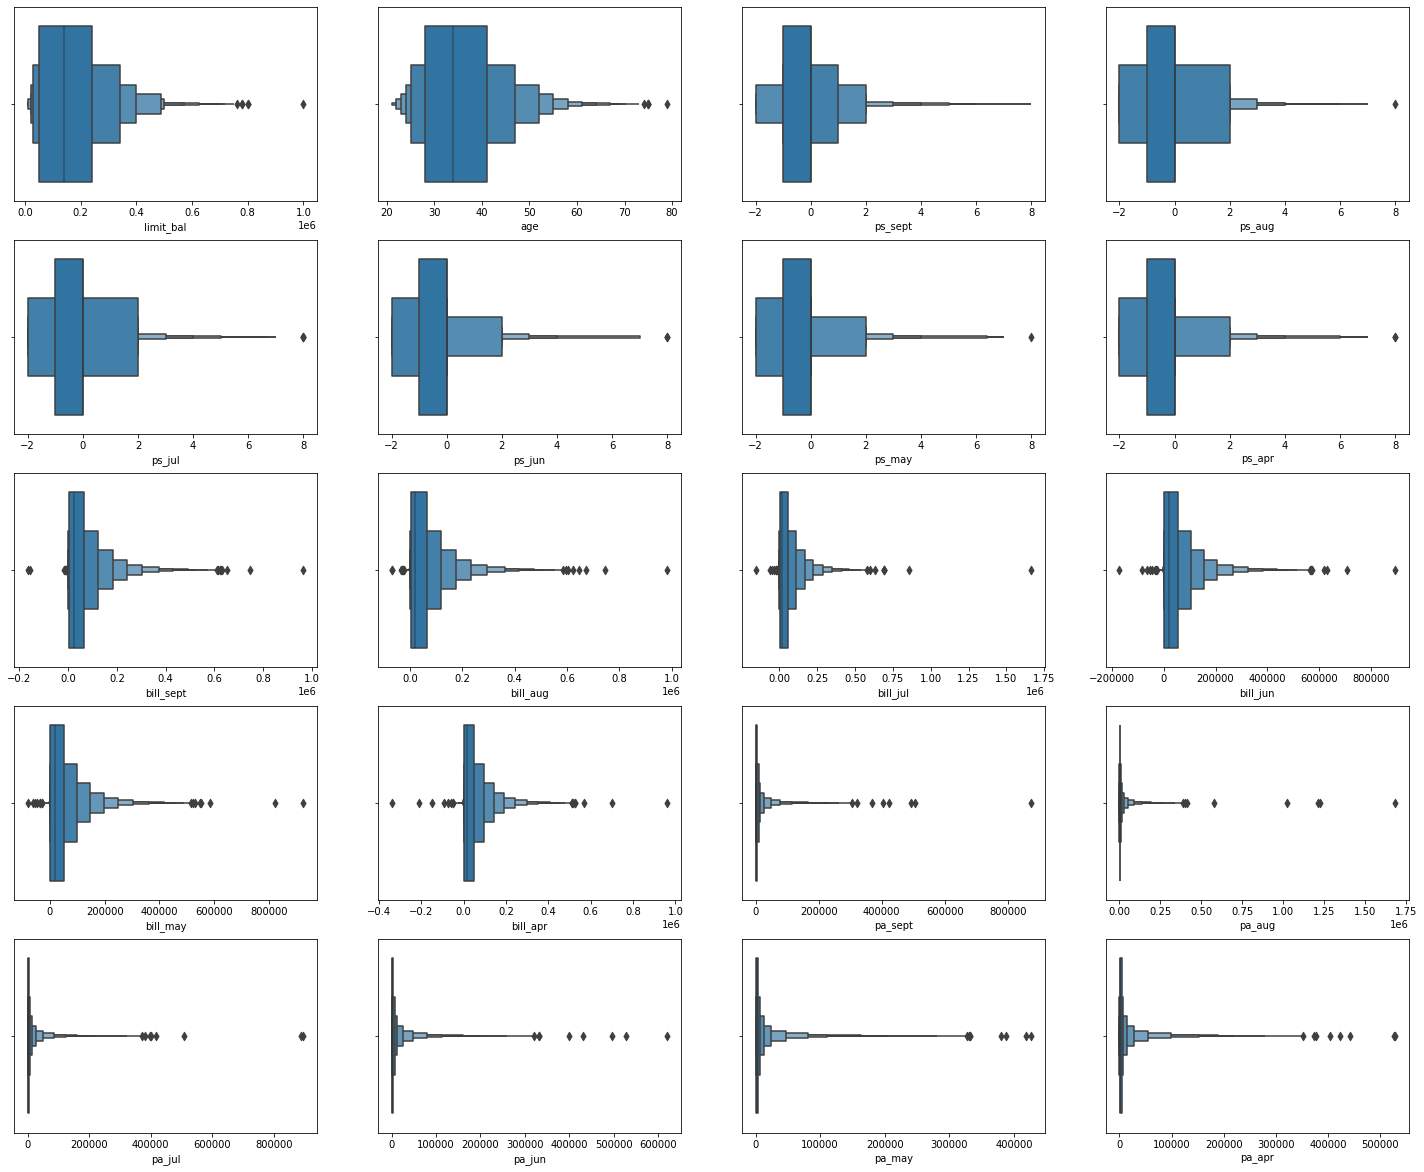

In [11]:
# plotting boxenplots for visualization
plt.figure(figsize=(25,25))
n=1
for i in numeric_features:
  plt.subplot(6,4,n)
  sns.boxenplot(df[i])
  n+=1

Let's once again check the distribution of Limit Balance and it's skewness.

Text(0.5, 1.0, 'Coeff. of Skewness= 0.992866960519544')

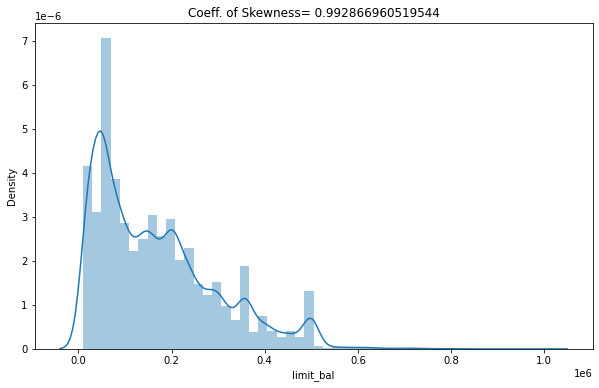

In [111]:
# distribution of limit balance
plt.figure(figsize=(10,6))
sns.distplot(df['limit_bal'])
plt.title('Coeff. of Skewness= '+ str(df['limit_bal'].skew()))


From the boxenplot, we observed that some of the data points had outliers. As far as the limit balance is concerned, there is a customer with balance around 1000000. Let's check the details about it.

In [ ]:
# checking the entry where limit_bal>800000
assumed_outlier = df.loc[df['limit_bal']>800000]
assumed_outlier

,ID,limit_bal,sex,education,marital_status,age,ps_sept,ps_aug,ps_jul,ps_jun,...,bill_jun,bill_may,bill_apr,pa_sept,pa_aug,pa_jul,pa_jun,pa_may,pa_apr,defaulted
2198,2198,1000000,2,1,1,47,0,0,0,-1,...,891586,927171,961664,50784,50723,896040,50000,50000,50256,0


Although the values for this customer is too high, the other entries indicate that he/she is a customer with excellent records and payments. There isn't any unusuality. Hence, we can not drop this entry.

Text(0.5, 1.0, 'Coeff. of Skeweness= 0.7322458687830562')

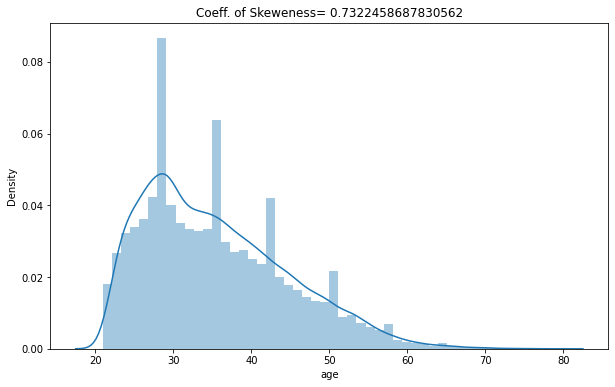

In [10]:
#let's check the distribution of age
plt.figure(figsize=(10,6))
sns.distplot(df['age'])
plt.title('Coeff. of Skeweness= '+ str(df['age'].skew()))

In [ ]:
#Checking the entries with age>72
assumed_outlier_age=df.loc[df['age']>72]
assumed_outlier_age

,ID,limit_bal,sex,education,marital_status,age,ps_sept,ps_aug,ps_jul,ps_jun,...,bill_jun,bill_may,bill_apr,pa_sept,pa_aug,pa_jul,pa_jun,pa_may,pa_apr,defaulted
247,247,250000,2,2,1,75,0,-1,-1,-1,...,1010,5572,794,1631,1536,1010,5572,794,1184,0
388,388,80000,1,3,1,73,-1,0,0,2,...,70646,72870,75018,3500,4330,3500,3500,3500,5100,1
10700,10700,140000,1,2,1,73,0,0,0,0,...,135772,138675,137197,5082,5008,5000,6016,5018,5264,0
18246,18246,440000,1,1,1,79,0,0,0,0,...,447112,438187,447543,15715,16519,16513,15800,16531,15677,0
25137,25137,180000,1,1,1,75,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
25142,25142,210000,1,2,1,75,0,0,0,0,...,203776,205901,210006,9700,8810,9000,7300,7500,7600,0
29164,29164,360000,2,3,1,73,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
29176,29176,160000,2,3,1,74,0,0,0,-1,...,16905,0,19789,3783,2268,16905,0,19789,26442,0
29180,29180,500000,2,2,1,73,-2,-2,-2,-2,...,2835,8896,3850,2826,2652,2835,8896,3850,711,1


Based on the above table, we can consider that most of these customers follow the trend of other customers. We can't drop these entries too.

# **EXPLORATORY DATA ANALYSIS**

Let's check the percentage of default in our data.

Text(0.5, 1.0, 'Probability of defaulting Payment')

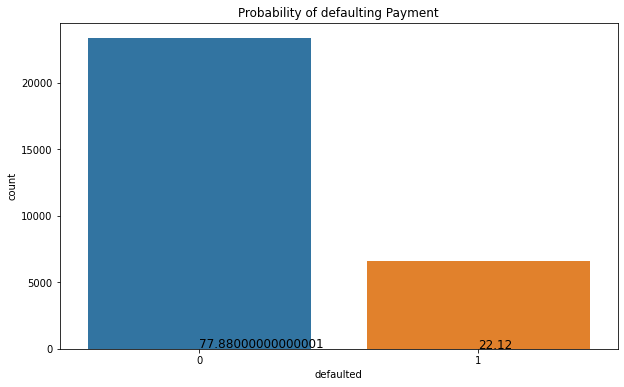

In [ ]:
# Plotting no of customers vs status
plt.figure(figsize=(10,6))
count = (df['defaulted'].value_counts(normalize=True)*100)
sns.countplot(data=df, x='defaulted')
for x,y in zip([0,1],count):
    plt.text(x,y,y,fontsize=12)
plt.title('Probability of defaulting Payment')



As we can see from the plot, it is observed that 22.12 percent people have defaulted whereas 77.8 percent people haven't. It clearly indicates that there is a class imbalance, which needs to be treated in futher steps.

Let's divide our customers on the basis of different categories and check the number of customers in each category.

In [102]:
# defining the categories
diff_categories=['sex','education','marital_status']


In [103]:
# checking the count of people in each category
for column in diff_categories:
  print(f'No of customers in different {column} categories are: \n')
  print(df[column].value_counts(),'\n')

No of customers in different sex categories are: 

2    18112
1    11888
Name: sex, dtype: int64 

No of customers in different education categories are: 

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64 

No of customers in different marital_status categories are: 

2    15964
1    13659
3      323
0       54
Name: marital_status, dtype: int64 



From the information above, we can say that:

*   The number of female customers is more than that of male customers.
*   Most of the customers have the education upto university level. There are very a few of customers whose education level is high-school.

*   Most of the customers are single.






In the dataset description, we have information about education status 1,2,3, and 4. We don't have information about the status 5,6, and zero. That is why we need to consider only those entries with education status 1,2,3,4. We can add the other customers in category 4.

In [104]:
#considering customers with known education status and merging others to 'other' category
edu_combine = (df['education'] == 5) | (df['education'] == 6) | (df['education'] == 0)
df.loc[edu_combine, 'education'] = 4
df['education'].value_counts(normalize = True)*100

2    46.766667
1    35.283333
3    16.390000
4     1.560000
Name: education, dtype: float64

Similarly, we don't have the status of marriage for 0. We will merge them into category 3.

In [105]:
# Merging the customers in category 0 with category 3
marriage_combine=df['marital_status'] == 0
df.loc[marriage_combine, 'marital_status'] = 3
df['marital_status'].value_counts(normalize = True)*100

2    53.213333
1    45.530000
3     1.256667
Name: marital_status, dtype: float64

Let's check how is the distribution of defaulted and non- defaulted customers.

In [106]:
#defining a new dataframe with education, marital status and education
cat_df = df[diff_categories]
cat_df['defaulted1'] = df.loc[: ,'defaulted']

In [107]:
#Replace the category names with correct names
cat_df.replace({'sex': {1 : 'MALE', 2 : 'FEMALE'},
                'education' : {1 : 'Graduate school', 2 : 'University', 3 : 'High school', 4 : 'Others'},
                'marital_status' :  {1 : 'Married', 2 : 'Single', 3 : 'Others'}},inplace=True)

<Figure size 720x360 with 0 Axes>

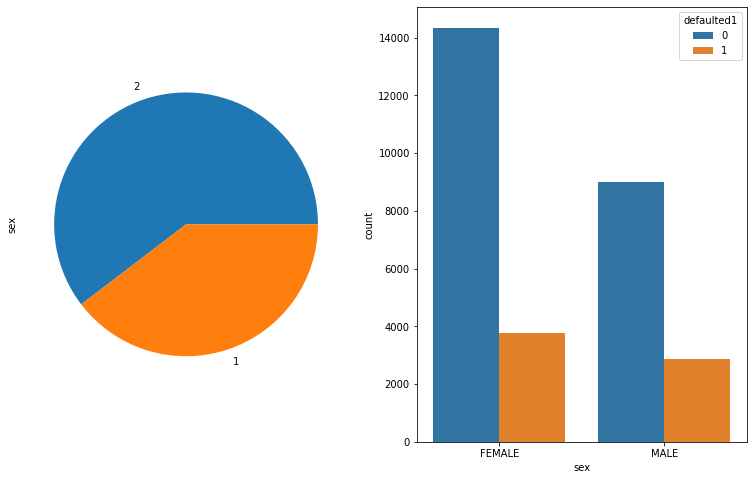

<Figure size 720x360 with 0 Axes>

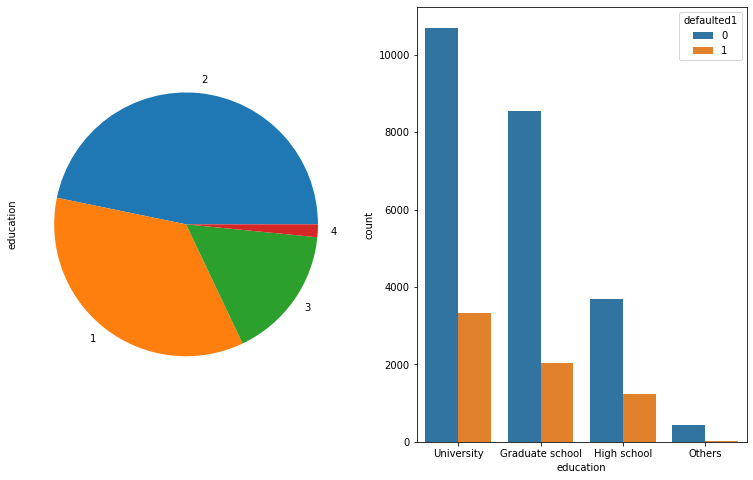

<Figure size 720x360 with 0 Axes>

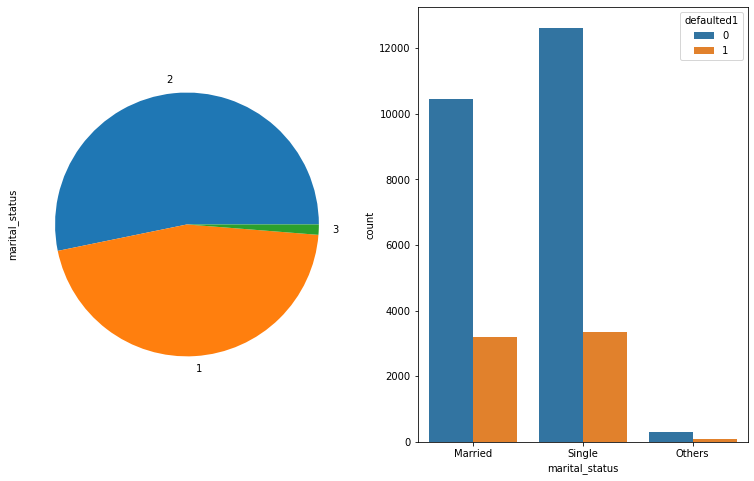

In [17]:
#creating a barplot and pie- chart
for col in diff_categories:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'defaulted1', data = cat_df)

We can observe the following facts:


*  Since the number of female customers is high, we have more number of defaulted customers who are females.
*   The people with high level of education (University and graduate) tend to default more.

*   Both unmarried and and married people tend to default. The proportion of defaulted unmarried people is slightly higher than defaulted married people.






We will observe the proportion of customers education-wise.

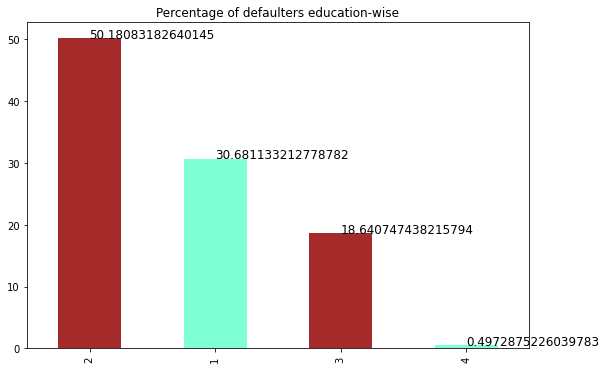

In [19]:
#plotting a graph of educationwise distribution
ax = df[df['defaulted'] == 1]['education'].value_counts(normalize = True)*100
ax.plot.bar(figsize=(9,6), color=('brown','aquamarine'))
plt.title("Defaulters proportion education-wise", fontsize=12)
for x,y in zip([0,1,2,3],ax):
    plt.text(x,y,y,fontsize=12)


It is observed that almost 50 precentage of total defaulters have university level education and as the education level drops, tendecy for defaulting also drops.

In [108]:
#grouping the customers on the basis of age
bins = [20,30,40,50,60,70,80]
classes = ['20-29','30-39','40-49','50-59','60-69','70-89']
df['age_group'] = pd.cut(x=df.age, bins=bins, labels=classes, right=True)

Text(0.5, 1.0, 'Defaulters number gender-wise')

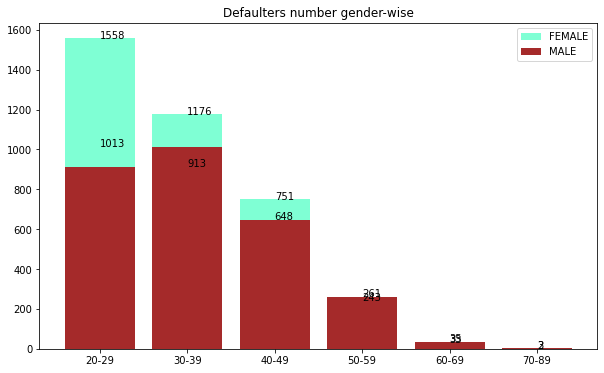

In [20]:
#plotting a graph for genderwise distribution of defaulters in different age group
males = df[df['sex'] == 1][df['defaulted'] ==1]['age_group'].value_counts()#males who are defaulted
females = df[df['sex'] == 2][df['defaulted'] ==1]['age_group'].value_counts()#females who are defaulted

plt.figure(figsize=(10,6))
plt.bar(females.index, females.values, label='FEMALE', color = ('aquamarine'))
plt.bar(males.index, males.values, label='MALE', color = ('brown'))

for x,y in zip(classes,females):
    plt.text(x,y,y,fontsize=10)

for x,y in zip(classes,males):
    plt.text(x,y,y,fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize= 10)

plt.legend(loc='upper right', fontsize=10)
plt.title("Defaulters number gender-wise", fontsize=12)

It is observed that females in the age group of 20-29 tend to become defaulted, whereas males in the age group of 30-39 tend to become defaulted.

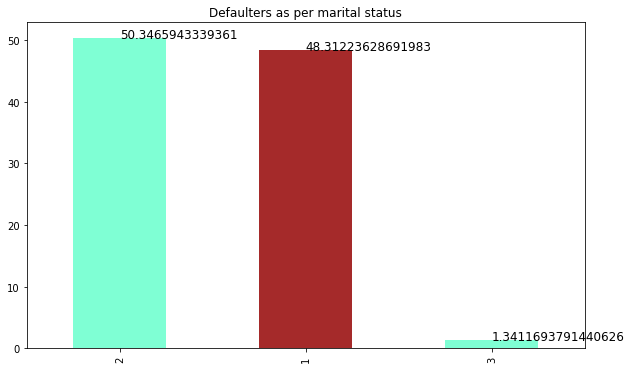

In [21]:
#defaultes as per marital status
ax = df[df['defaulted'] == 1]['marital_status'].value_counts(normalize = True)*100
ax.plot.bar(figsize=(10,6), color = ('aquamarine','brown'))

plt.title("Defaulters as per marital status", fontsize=12)
for x,y in zip([0,1,2],ax):
    plt.text(x,y,y,fontsize=12)
plt.show()

It is again noted that most of the defaulted customers are unmarried. But there is no significant difference between the proportion of married and unmarried people. 

Text(0.5, 1.0, 'Age wise distribution of defaulted customers')

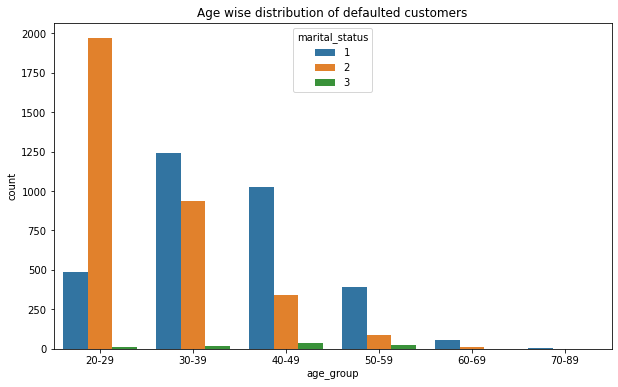

In [22]:
#let's check the marital status and age wise distribution
plt.figure(figsize=(10,6))
has_defaulted=df[df['defaulted']==1]
sns.countplot(x='age_group',hue='marital_status',data=has_defaulted)
plt.title('Age wise distribution of defaulted customers')

It can be noted that as the age increases, number of defaulted customers decreases. In each age group we have almost same distribution of married,single and other people. So we can conclude that the age is more important in this case, not marital status. 

*   As the age increases, no of defaulted customers decreases.



Let's check the maximum credit limit allocated for customers in different education levels.

In [23]:
#dataframe with education levels and their median limit balance
education_df=pd.DataFrame(df.groupby(['education']).limit_bal.median()).reset_index()

Text(0.5, 1.0, 'Median of credit limits')

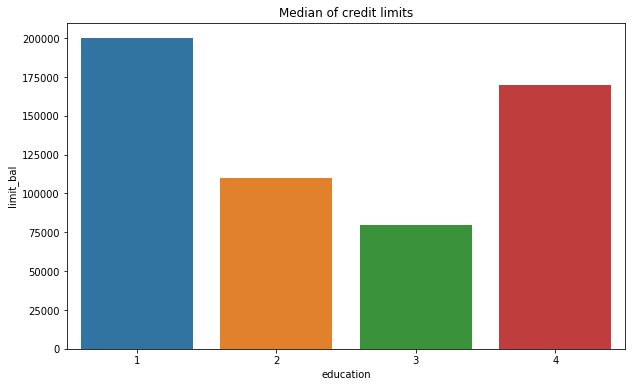

In [25]:
#plotting the graph
plt.figure(figsize=(10,6))
sns.barplot(x=education_df['education'],y=education_df['limit_bal'])
plt.title('Median of credit limits')

It can be noted that the credit limits for customers with higher education is higher.

Let's check the distribution of credit limit for defaulted and non defaulted customers

Text(0.5, 1.0, 'Limit Balance & default next month')

<Figure size 720x432 with 0 Axes>

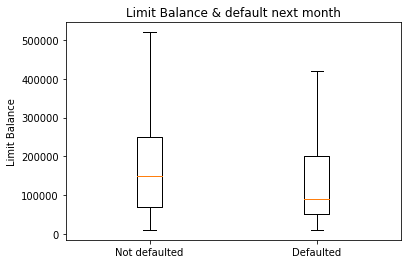

In [26]:
#plotting a boxplot for limit balance and default
def_0 = df.loc[df['defaulted'] == 0,'limit_bal']
def_1 = df.loc[df['defaulted'] == 1,'limit_bal']

plt.figure(figsize=(10,6))
fig, ax = plt.subplots()
ax.boxplot([def_0, def_1],  showfliers=False)

ax.set_xticklabels(['Not defaulted',"Defaulted"])
ax.set_ylabel('Limit Balance')
ax.set_title('Limit Balance & default next month')



It is noted that the median value of limit balance for non defaulted customers is high, whereas defaulted customers have less credit limit.

In [ ]:
df

,ID,limit_bal,sex,education,marital_status,age,ps_sept,ps_aug,ps_jul,ps_jun,...,bill_jun,bill_may,bill_apr,pa_sept,pa_aug,pa_jul,pa_jun,pa_may,pa_apr,defaulted
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [39]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marital_status', 'age', 'ps_sept',
       'ps_aug', 'ps_jul', 'ps_jun', 'ps_may', 'ps_apr', 'bill_sept',
       'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr', 'pa_sept',
       'pa_aug', 'pa_jul', 'pa_jun', 'pa_may', 'pa_apr', 'defaulted',
       'age_group'],
      dtype='object', name=0)

In [113]:
#creating a copy of the data
df_copy=df.copy()

<Figure size 864x864 with 0 Axes>

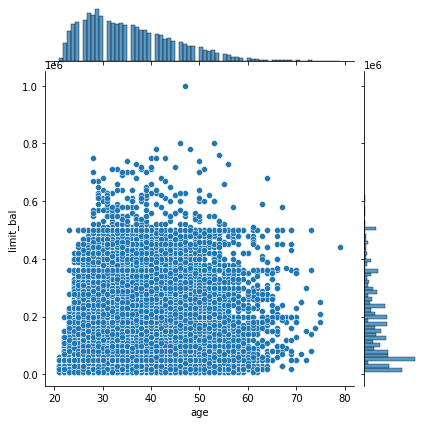

In [131]:
# bi-variate analysis of age and limit blance
plt.figure(figsize=(12,12))
sns.jointplot(x='age',y='limit_bal',data=df,kind="scatter")

In [ ]:
#we have the datatypes as object. We need to convert them into integer form
df_copy.limit_bal  = df.limit_bal.astype("int64")
df_copy.age  = df.age.astype("int64")
df_copy.bill_sept=df.bill_sept.astype('int64')
df_copy.bill_aug=df.bill_aug.astype('int64')
df_copy.bill_jul=df.bill_jul.astype('int64')
df_copy.bill_jun=df.bill_jun.astype('int64')
df_copy.bill_may=df.bill_may.astype('int64')
df_copy.bill_apr=df.bill_apr.astype('int64')
df_copy.pa_sept=df.pa_sept.astype('int64')
df_copy.pa_aug=df.pa_aug.astype('int64')
df_copy.pa_jul=df.pa_jul.astype('int64')
df_copy.pa_jun=df.pa_jun.astype('int64')
df_copy.pa_may=df.pa_may.astype('int64')
df_copy.pa_apr=df.pa_apr.astype('int64')
df_copy.defulted=df.defaulted.astype('int64')


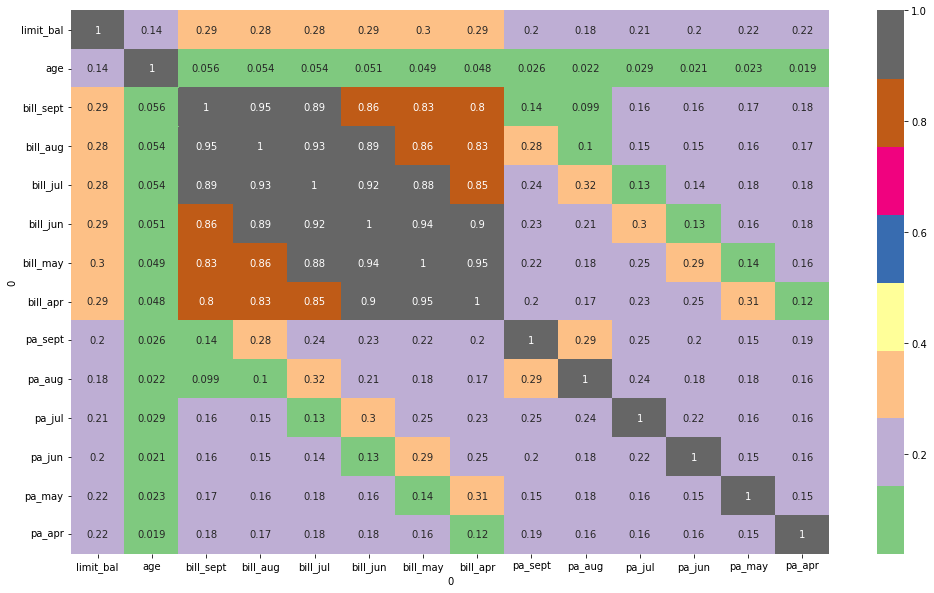

In [29]:
# Creating the heatmap for analysing the relationship between numerical columns
plt.figure(figsize=(17,10))
sns.heatmap(df_copy.corr(),annot=True,cmap='Accent')

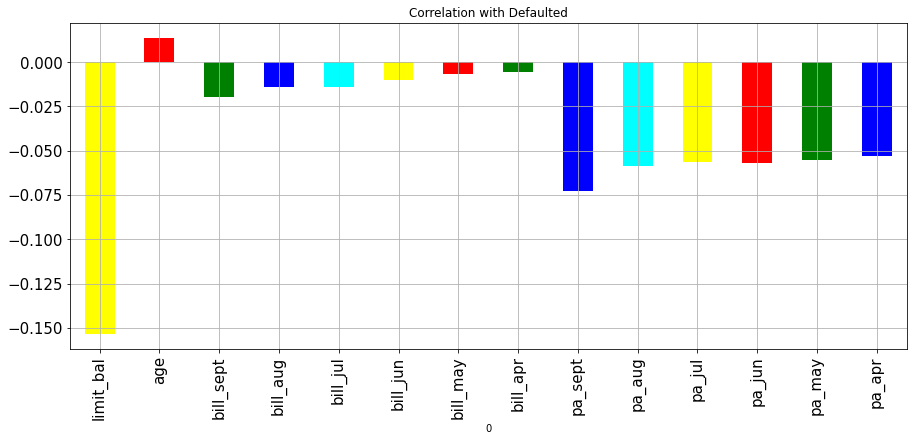

In [123]:
# checking the correlation of each feature with target variable, i.e, defaulted
X = df_copy.drop(['defaulted'],axis=1)
X.corrwith(df_copy['defaulted'].astype('int')).plot.bar(figsize = (15,6), title = "Correlation with Defaulted", 
                                        fontsize = 15,rot = 90, grid = True,color=['yellow', 'red', 'green', 'blue', 'cyan'])

It is obseved that limit_bal is most negatively correlated with target variable.

In [38]:
#dropping the column that is not required further
df_copy=df.drop(['age_group'],axis=1)

In [39]:
#one hot encoding of categorical features
pd.get_dummies( columns= ['sex', 'education'], prefix = ['sex', 'education'], data = df_copy, drop_first = True)

,limit_bal,marital_status,age,ps_sept,ps_aug,ps_jul,ps_jun,ps_may,ps_apr,bill_sept,...,pa_aug,pa_jul,pa_jun,pa_may,pa_apr,defaulted,sex_2,education_2,education_3,education_4
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,1,24,2,2,-1,-1,-2,-2,3913,...,689,0,0,0,0,1,1,1,0,0
2,120000,2,26,-1,2,0,0,0,2,2682,...,1000,1000,1000,0,2000,1,1,1,0,0
3,90000,2,34,0,0,0,0,0,0,29239,...,1500,1000,1000,1000,5000,0,1,1,0,0
4,50000,1,37,0,0,0,0,0,0,46990,...,2019,1200,1100,1069,1000,0,1,1,0,0
5,50000,1,57,-1,0,-1,0,0,0,8617,...,36681,10000,9000,689,679,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,39,0,0,0,0,0,0,188948,...,20000,5003,3047,5000,1000,0,0,0,1,0
29997,150000,2,43,-1,-1,-1,-1,0,0,1683,...,3526,8998,129,0,0,0,0,0,1,0
29998,30000,2,37,4,3,2,-1,0,0,3565,...,0,22000,4200,2000,3100,1,0,1,0,0


# **Train- Test Splitting**

In [132]:
#importing the library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [41]:
#assigning the values to X and y
X = df_copy.iloc[:, :-1]
y = df_copy['defaulted']
y=y.astype('int')

In [42]:
#splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42,stratify = y )

In [43]:
y_train= y_train.astype('int')

# **RANDOM FOREST**
Random forest fits a number of decision tree classifiers on a number of sub- samples from the parent dataset and uses average of the predictions of all classifers for final prediction.

In [133]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
params = {'n_estimators':[50,60,75,100], 'max_depth':[3, 5, 7,9,11,15]}
classifier = GridSearchCV(rfc, param_grid = params, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 15],
                         'n_estimators': [50, 60, 75, 100]},
             scoring='roc_auc')

In [89]:
# predicting the value for train data
y_pred_train_rf=classifier.predict(X_train)

In [90]:
#predicting the value for test data
y_pred_test_rf=classifier.predict(X_test)

In [91]:
y_test=y_test.astype('int')

In [46]:
#importing the performance evaluation matrices
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix,f1_score, precision_score, recall_score, classification_report

In [47]:
# let's write a function for evaluating the performance of training data
def performance_eval(y_actual, y_pred):
  accuracy=accuracy_score(y_actual,y_pred)
  print(f'The accuracy for training data is {accuracy}')

  precision=precision_score(y_actual,y_pred)
  print(f'The precision Score for training data is {precision}')

  recall=recall_score(y_actual,y_pred)
  print(f'The recall Score for training data is {recall}')

  f1=f1_score(y_actual,y_pred)
  print(f'The f1 Score for training data is {f1}')


  roc=roc_auc_score(y_actual,y_pred)
  print(f'The roc score for training data is {roc}')
  print('\n')

  class_rep=classification_report(y_actual, y_pred)
  print('The classification report is: ')
  print(class_rep)


In [48]:
#for test data
def performance_eval_test(y_actual, y_pred):
  accuracy=accuracy_score(y_actual,y_pred)
  print(f'The accuracy for testing data is {accuracy}')

  precision=precision_score(y_actual,y_pred)
  print(f'The precision Score for testing data is {precision}')

  recall=recall_score(y_actual,y_pred)
  print(f'The recall Score for testing data is {recall}')

  f1=f1_score(y_actual,y_pred)
  print(f'The f1 Score for testing data is {f1}')


  roc=roc_auc_score(y_actual,y_pred)
  print(f'The roc score for testing data is {roc}')
  print('\n')

  class_rep=classification_report(y_actual, y_pred)
  print('The classification report is: ')
  print(class_rep)

In [92]:
#values for train data
performance_eval(y_pred_train_rf, y_train)

The accuracy for training data is 0.8485238095238096
The precision Score for training data is 0.4219590958019376
The recall Score for training data is 0.7980456026058632
The f1 Score for training data is 0.5520349246584988
The roc score for training data is 0.8266274173512491


The classification report is: 
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     18544
           1       0.42      0.80      0.55      2456

    accuracy                           0.85     21000
   macro avg       0.70      0.83      0.73     21000
weighted avg       0.91      0.85      0.87     21000



In [49]:
# function to plot confusion matrix
def confusion_plot(y_actual, y_pred):
  labels = ['Not default', 'Default']
  cm = confusion_matrix(y_actual, y_pred)
  print(cm)

  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

  # labels, title and ticks
  plt.figure(figsize=(10,6))
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)


[[15859  2685]
 [  496  1960]]


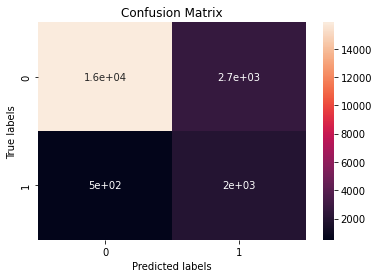

<Figure size 720x432 with 0 Axes>

In [94]:
confusion_plot(y_pred_train_rf,y_train)

In [50]:
#roc- auc
from sklearn.metrics import roc_curve

In [51]:
#precison- recall plotting
def pr_curve(y_test, y_score):
  precision, recall, thresholds = precision_recall_curve(y_test, y_score)

  #create precision recall curve
  fig, ax = plt.subplots()
  ax.plot(recall, precision, color='purple')

  #add axis labels to plot
  ax.set_title('Precision-Recall Curve')
  ax.set_ylabel('Precision')
  ax.set_xlabel('Recall')

  #display plot
  plt.show()


In [52]:
# to plot roc-auc plot
def roc_plot(fpr,tpr):
  plt.subplots(1, figsize=(7,7))
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr)
  plt.plot([0, 1], ls="--")
  plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  

In [134]:
#calculating the different variables for plotting the data
 y_score_1 = classifier.predict_proba(X_train)[:,1]
 false_positive_rate_1, true_positive_rate_1, threshold1 = roc_curve(y_train, y_score_1)

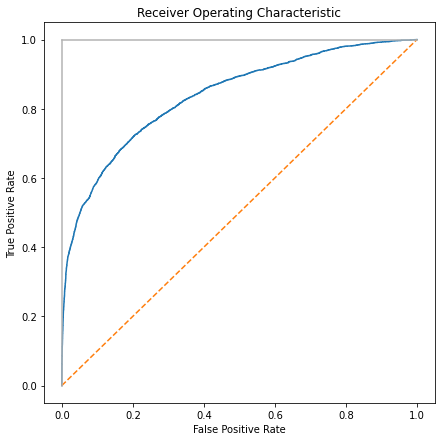

In [104]:
#for train data
roc_plot(false_positive_rate_1, true_positive_rate_1)

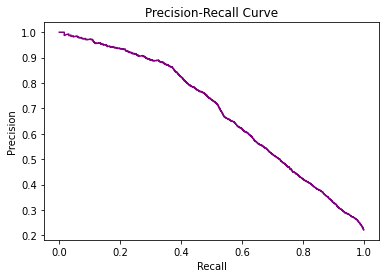

In [108]:
#for train data
pr_curve(y_train, y_score_1)

In [110]:
#for test data
performance_eval_test(y_pred_test_rf,y_test)

The accuracy for testing data is 0.818
The precision Score for testing data is 0.347564038171773
The recall Score for testing data is 0.6711930164888458
The f1 Score for testing data is 0.45797485109199204
The roc score for testing data is 0.7540931828585526


The classification report is: 
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7969
           1       0.35      0.67      0.46      1031

    accuracy                           0.82      9000
   macro avg       0.65      0.75      0.67      9000
weighted avg       0.88      0.82      0.84      9000



[[6670 1299]
 [ 339  692]]


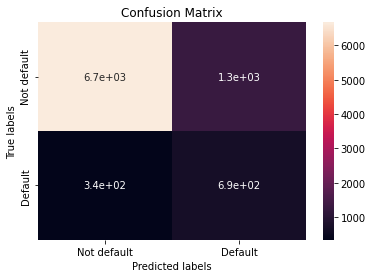

<Figure size 720x432 with 0 Axes>

In [111]:
confusion_plot(y_pred_test_rf,y_test)

In [119]:
y_score1 = classifier.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

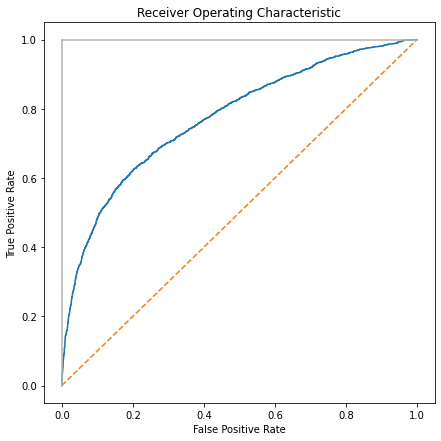

In [113]:
roc_plot(false_positive_rate1, true_positive_rate1)

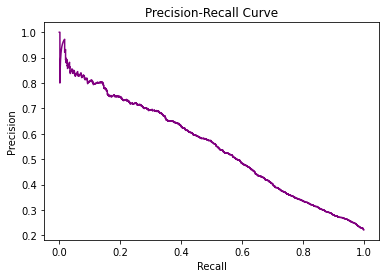

In [122]:
pr_curve(y_test, y_score1)

# **LOGISTIC REGRESSION**
Logistic regression fits as S shaped curve to indicate the likelihood of the output. 

In [123]:
#importing the library and performing cross validation
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
params = {'penalty':['l2','elasticnet'], 'max_iter':[75,100,200,250]}
classifier_lr = GridSearchCV(lr, param_grid = params, scoring = 'roc_auc', cv=5, n_jobs=-1)



In [124]:
# Fit the object to train dataset
classifier_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [75, 100, 200, 250],
                         'penalty': ['l2', 'elasticnet']},
             scoring='roc_auc')

In [125]:
#predicting the values
y_pred_train_lr=classifier_lr.predict(X_train)
y_pred_test_lr=classifier_lr.predict(X_test)

In [126]:
#evaluating the performance
performance_eval(y_pred_train_lr, y_train)

The accuracy for training data is 0.7782380952380953
The precision Score for training data is 0.000861141011840689
The recall Score for training data is 0.2
The f1 Score for training data is 0.0017148981779206863
The roc score for training data is 0.4893946615824595


The classification report is: 
              precision    recall  f1-score   support

           0       1.00      0.78      0.88     20980
           1       0.00      0.20      0.00        20

    accuracy                           0.78     21000
   macro avg       0.50      0.49      0.44     21000
weighted avg       1.00      0.78      0.87     21000



[[16339  4641]
 [   16     4]]


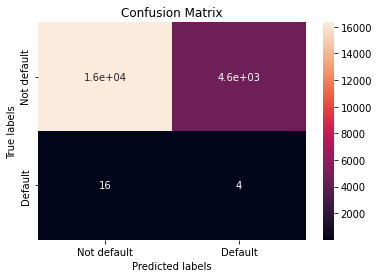

<Figure size 720x432 with 0 Axes>

In [127]:
confusion_plot(y_pred_train_lr,y_train)

In [128]:
 y_score_2 = classifier_lr.predict_proba(X_train)[:,1]
 false_positive_rate_2, true_positive_rate_2, threshold1 = roc_curve(y_train, y_score_2)

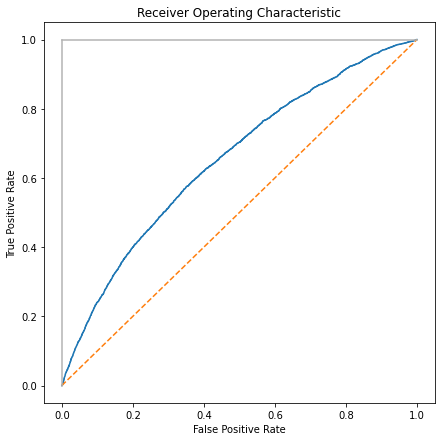

In [129]:
roc_plot(false_positive_rate_2, true_positive_rate_2)

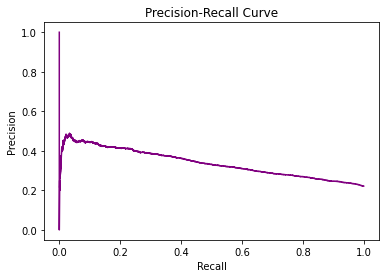

In [130]:
pr_curve(y_train, y_score_2)

In [131]:
#for test data
performance_eval_test(y_pred_test_lr, y_test)

The accuracy for testing data is 0.7785555555555556
The precision Score for testing data is 0.0005022601707684581
The recall Score for testing data is 0.25
The f1 Score for testing data is 0.0010025062656641606
The roc score for testing data is 0.5143952867941307


The classification report is: 
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      8996
           1       0.00      0.25      0.00         4

    accuracy                           0.78      9000
   macro avg       0.50      0.51      0.44      9000
weighted avg       1.00      0.78      0.88      9000



[[7006 1990]
 [   3    1]]


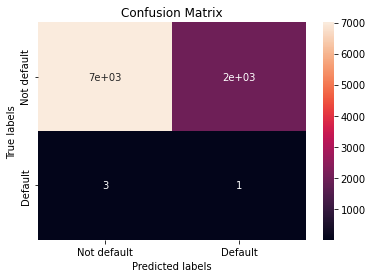

<Figure size 720x432 with 0 Axes>

In [132]:
confusion_plot(y_pred_test_lr,y_test)

In [135]:
y_score2 = classifier_lr.predict_proba(X_test)[:,1]
false_positive_rate2, true_positive_rate2, threshold1 = roc_curve(y_test, y_score2)

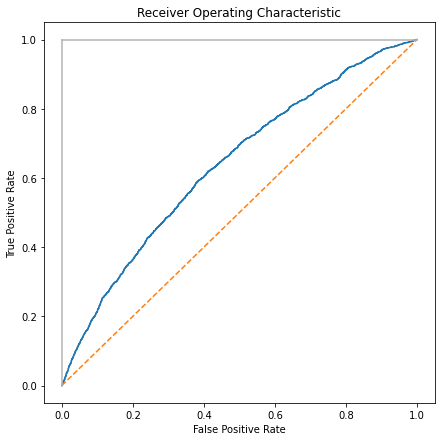

In [139]:
roc_plot(false_positive_rate2, true_positive_rate2)

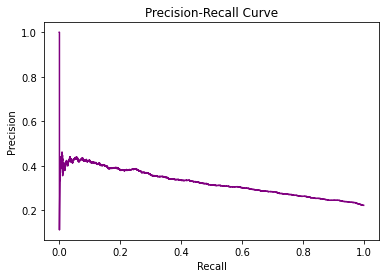

In [140]:
pr_curve(y_test, y_score2)

# **K- NEAREST NEIGHBORS (KNN)**
It is a model which uses proximity to make clssifications. It classifies a new data point based on the similarity. 


In [60]:
#importing the libraries
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
params = {'n_neighbors':[1,2,5,7,10,12,15]}
classifier_knn = GridSearchCV(knn, param_grid = params, scoring = 'roc_auc', cv=5, n_jobs=-1,verbose=1)

In [141]:
#fitting the values to the model
classifier_knn.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 5, 7, 10, 12, 15]},
             scoring='roc_auc', verbose=1)

In [142]:
#predicting the values
y_pred_train_knn=classifier_knn.predict(X_train)
y_pred_test_knn=classifier_knn.predict(X_test)

In [143]:
#evaluating the performance
performance_eval(y_pred_train_knn,y_train)

The accuracy for training data is 0.7902380952380952
The precision Score for training data is 0.1519913885898816
The recall Score for training data is 0.6023890784982935
The f1 Score for training data is 0.24273680591370123
The roc score for training data is 0.7018653078591931


The classification report is: 
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     19828
           1       0.15      0.60      0.24      1172

    accuracy                           0.79     21000
   macro avg       0.56      0.70      0.56     21000
weighted avg       0.93      0.79      0.84     21000



[[15889  3939]
 [  466   706]]


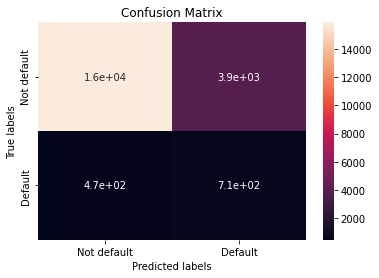

<Figure size 720x432 with 0 Axes>

In [144]:
confusion_plot(y_pred_train_knn,y_train)

In [145]:
y_score_3 = classifier_knn.predict_proba(X_train)[:,1]
false_positive_rate_3, true_positive_rate_3, threshold1 = roc_curve(y_train, y_score_3)

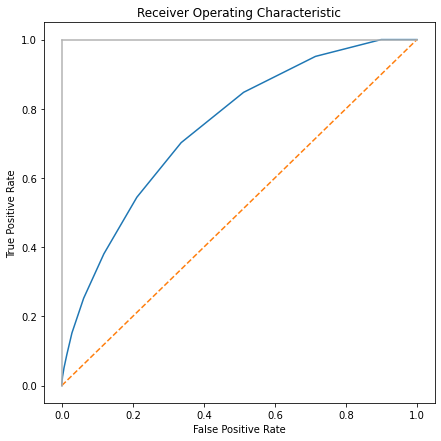

In [146]:
roc_plot(false_positive_rate_3, true_positive_rate_3)

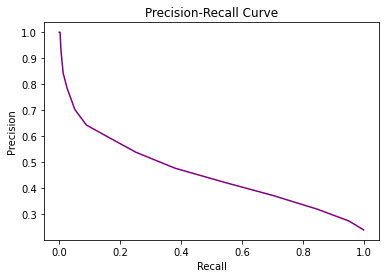

In [149]:
pr_curve(y_train, y_score_3)

In [150]:
#for test data
performance_eval_test(y_pred_test_knn, y_test)

The accuracy for testing data is 0.7743333333333333
The precision Score for testing data is 0.10848819688598695
The recall Score for testing data is 0.4576271186440678
The f1 Score for testing data is 0.17539585870889157
The roc score for testing data is 0.6247446099786943


The classification report is: 
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      8528
           1       0.11      0.46      0.18       472

    accuracy                           0.77      9000
   macro avg       0.54      0.62      0.52      9000
weighted avg       0.92      0.77      0.83      9000



[[6753 1775]
 [ 256  216]]


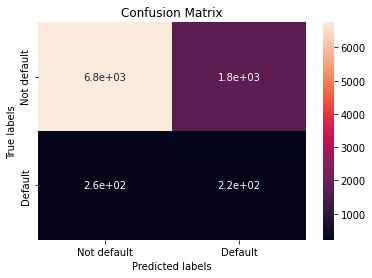

<Figure size 720x432 with 0 Axes>

In [151]:
confusion_plot(y_pred_test_knn, y_test)

In [152]:
 y_score3 = classifier_knn.predict_proba(X_test)[:,1]
 false_positive_rate3, true_positive_rate3, threshold1 = roc_curve(y_test, y_score3)

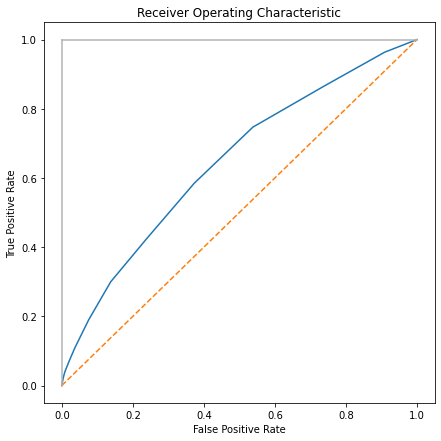

In [153]:
roc_plot(false_positive_rate3, true_positive_rate3)

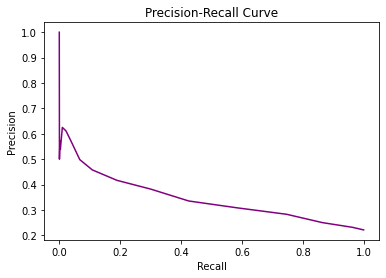

In [154]:
pr_curve(y_test, y_score3)

# **DECISION TREE**
It is a flow-chart like tree structure where internal nodes indicates the attribute and branches represent the outcome of a test and leaf nodes are class labelled.


In [33]:
#importing decisiontree classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [34]:
# Choosing different depths
max_depth = [3,6,9,12]
 
# Choosing minimum number of samples
min_samples_split = [2,5,10,20,30]
 
# Choosing the min samples in leaf
min_samples_leaf = [1,4,8,16,24]
 
# Hyperparameters
parameters = {'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [38]:
#performing cross validation
classifier_dtr=HalvingGridSearchCV(dtc,parameters,cv=5,scoring='r2',n_jobs=-1)

In [39]:
#Fitting the data
classifier_dtr.fit(X_train,y_train)

HalvingGridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
                    param_grid={'max_depth': [3, 6, 9, 12],
                                'min_samples_leaf': [1, 4, 8, 16, 24],
                                'min_samples_split': [2, 5, 10, 20, 30]},
                    scoring='r2')

In [40]:
#prediciting the values
y_pred_train_dtr=classifier_dtr.predict(X_train)
y_pred_test_dtr=classifier_dtr.predict(X_test)

In [50]:
#performance evaluation
performance_eval(y_train,y_pred_train_dtr)

The accuracy for training data is 0.8243809523809524
The precision Score for training data is 0.6866952789699571
The recall Score for training data is 0.3789020452099031
The f1 Score for training data is 0.48834628190899
The roc score for training data is 0.6649019550415152


The classification report is: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     16355
           1       0.69      0.38      0.49      4645

    accuracy                           0.82     21000
   macro avg       0.77      0.66      0.69     21000
weighted avg       0.81      0.82      0.80     21000



[[15552   803]
 [ 2885  1760]]


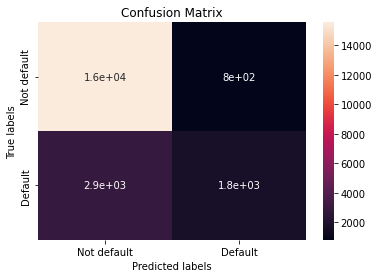

<Figure size 720x432 with 0 Axes>

In [51]:
confusion_plot(y_train,y_pred_train_dtr)

In [60]:
 y_score_4 = classifier_dtr.predict_proba(X_train)[:,1]
 false_positive_rate_4, true_positive_rate_4, threshold1 = roc_curve(y_train, y_score_4)

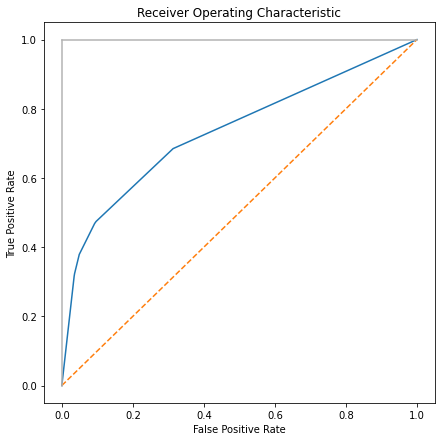

In [61]:
roc_plot(false_positive_rate_4, true_positive_rate_4)

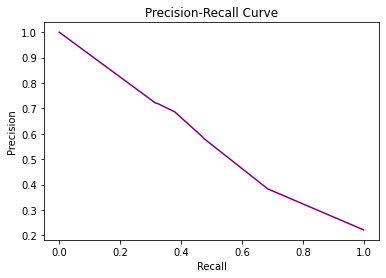

In [62]:
pr_curve(y_train, y_score_4)

In [63]:
#for testing data
performance_eval_test(y_pred_test_dtr, y_test)

The accuracy for testing data is 0.8175555555555556
The precision Score for testing data is 0.3571069814163737
The recall Score for testing data is 0.6626281453867661
The f1 Score for testing data is 0.4640992167101828
The roc score for testing data is 0.7505773500997158


The classification report is: 
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7927
           1       0.36      0.66      0.46      1073

    accuracy                           0.82      9000
   macro avg       0.65      0.75      0.68      9000
weighted avg       0.88      0.82      0.84      9000



[[6647  362]
 [1280  711]]


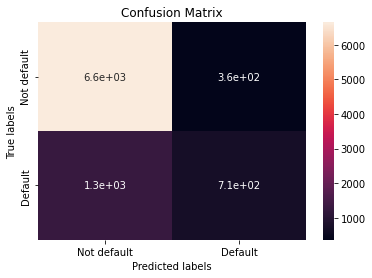

<Figure size 720x432 with 0 Axes>

In [66]:
confusion_plot(y_test, y_pred_test_dtr)

In [67]:
 y_score4 = classifier_dtr.predict_proba(X_test)[:,1]
 false_positive_rate4, true_positive_rate4, threshold1 = roc_curve(y_test, y_score4)

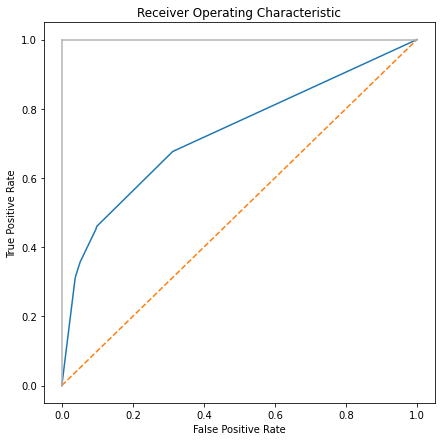

In [68]:
roc_plot(false_positive_rate4, true_positive_rate4)

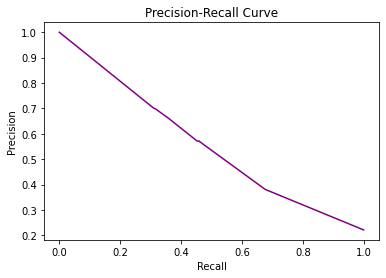

In [69]:
pr_curve(y_test, y_score4)

# **IMPLEMENTING SMOTE**
As we have checked earlier, there is a class imbalance for target variable in our dataset. In order to improve the performance of models in such situations, we need to perform either oversampling, undersampling or SMOTE.
SMOTE stands for Synthetic Minority Oversampling Technique. It works  by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

In [53]:
#importing the libraries
from collections import Counter
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)


In [54]:
# summarize the new class distribution
counter = Counter(y_sm)
counter

Counter({1: 23364, 0: 23364})

In [55]:
#train test splitting
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm,y_sm, test_size = 0.2, random_state = 42,stratify = y_sm)

# **RANDOM FOREST WITH SMOTE**

In [56]:
#creating the class and parameter grid
rfc_sm=RandomForestClassifier()
params = {'n_estimators':[50,60,75,100], 'max_depth':[3, 5, 7,9,11,15]}
classifier = HalvingGridSearchCV(rfc_sm, param_grid = params, scoring = 'roc_auc', cv=5, n_jobs=-1)

# Fit the object to train dataset
classifier.fit(X_train_sm, y_train_sm)

HalvingGridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                    param_grid={'max_depth': [3, 5, 7, 9, 11, 15],
                                'n_estimators': [50, 60, 75, 100]},
                    scoring='roc_auc')

In [57]:
#predicting the values
y_pred_rf_sm=classifier.predict(X_test_sm)

In [58]:
#evaluating the performance
performance_eval_test(y_test_sm,y_pred_rf_sm)

The accuracy for testing data is 0.8757757329338755
The precision Score for testing data is 0.9147378365611715
The recall Score for testing data is 0.828803766317141
The f1 Score for testing data is 0.8696530818457392
The roc score for testing data is 0.8757757329338755


The classification report is: 
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4673
           1       0.91      0.83      0.87      4673

    accuracy                           0.88      9346
   macro avg       0.88      0.88      0.88      9346
weighted avg       0.88      0.88      0.88      9346



[[4335  338]
 [ 807 3866]]


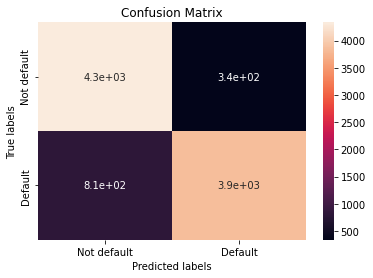

<Figure size 720x432 with 0 Axes>

In [41]:
confusion_plot(y_test_sm,y_pred_rf_sm)

In [82]:
 y_score1 = classifier.predict_proba(X_test_sm)[:,1]
 false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test_sm, y_score1)

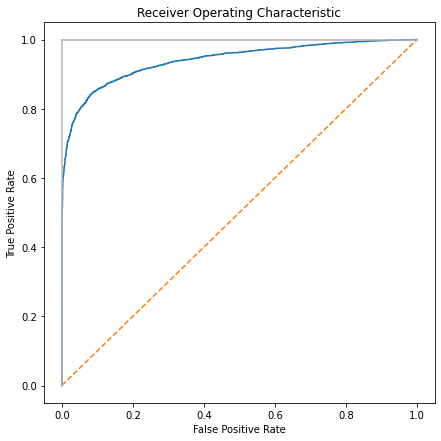

In [83]:
roc_plot(false_positive_rate1, true_positive_rate1)

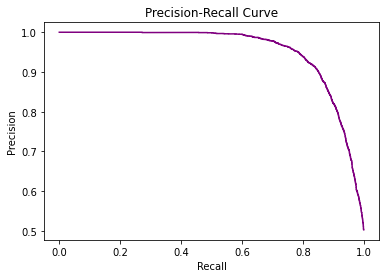

In [84]:
pr_curve(y_test_sm, y_score1)

Let's check the feature importance

In [59]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


In [60]:
#importing shap and graphviz
import shap
import graphviz

In [61]:
#new sample training data
X_sampled = X_test_sm.sample(1000, random_state=10)

In [62]:
#training randomforest using best parameters
best_params=classifier.best_params_
rfc1=RandomForestClassifier(max_depth=11, n_estimators=100)

In [63]:
best_params

{'max_depth': 15, 'n_estimators': 100}

In [64]:
rfc1.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=11)

In [65]:
explainer = shap.TreeExplainer(rfc1)
shap_values = explainer.shap_values(X_sampled)

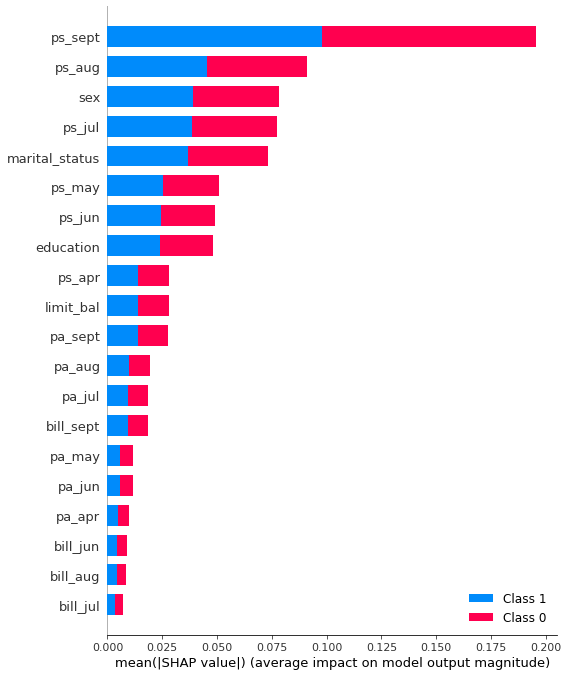

In [66]:
#plotting the feature importance
shap.summary_plot(shap_values, features=X_sampled, feature_names=X_sampled.columns, plot_type='bar')

# **LOGISTIC REGRESSION WITH SMOTE**

In [48]:
#importing the library and cross validating
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
params = {'penalty':['l2','elasticnet'], 'max_iter':[75,100,200,250]}
classifier_lr = GridSearchCV(lr, param_grid = params, scoring = 'roc_auc', cv=5, n_jobs=-1)

In [50]:
#fitting the data
classifier_lr.fit(X_train_sm,y_train_sm)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [75, 100, 200, 250],
                         'penalty': ['l2', 'elasticnet']},
             scoring='roc_auc')

In [52]:
#predicting the values
y_pred_lr_sm=classifier_lr.predict(X_test_sm)

In [54]:
#evaluating the performance
performance_eval_test(y_pred_lr_sm,y_test_sm)

The accuracy for testing data is 0.6239032741279692
The precision Score for testing data is 0.7438476353520223
The recall Score for testing data is 0.5999309630652399
The f1 Score for testing data is 0.6641826693417406
The roc score for testing data is 0.6314688599109984


The classification report is: 
              precision    recall  f1-score   support

           0       0.50      0.66      0.57      3552
           1       0.74      0.60      0.66      5794

    accuracy                           0.62      9346
   macro avg       0.62      0.63      0.62      9346
weighted avg       0.65      0.62      0.63      9346



[[2355 1197]
 [2318 3476]]


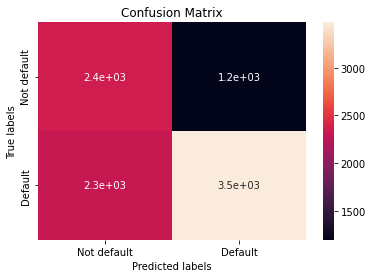

<Figure size 720x432 with 0 Axes>

In [55]:
confusion_plot(y_pred_lr_sm,y_test_sm)

In [78]:
y_score2 = classifier_lr.predict_proba(X_test_sm)[:,1]
false_positive_rate2, true_positive_rate2, threshold1 = roc_curve(y_test_sm, y_score2)

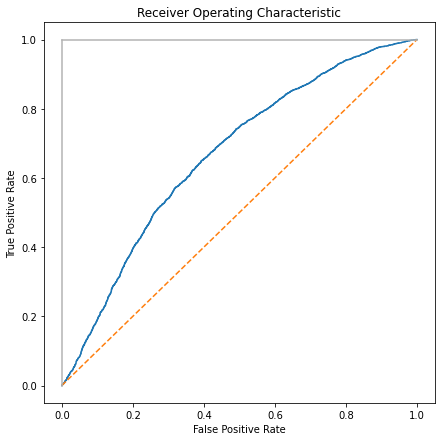

In [80]:
roc_plot(false_positive_rate2, true_positive_rate2)

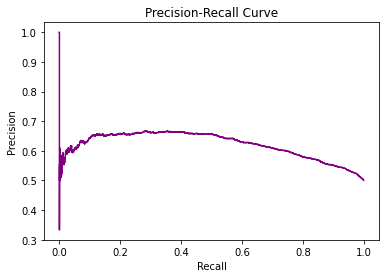

In [77]:
pr_curve(y_test_sm, y_score2)

# **KNN WITH SMOTE**

In [61]:
#cross validation
knn = KNeighborsClassifier()
params = {'n_neighbors':[1,2,5,7,10,12,15]}
classifier_knn = GridSearchCV(knn, param_grid = params, scoring = 'roc_auc', cv=5, n_jobs=-1,verbose=1)

In [62]:
#fitting the data
classifier_knn.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 5, 7, 10, 12, 15]},
             scoring='roc_auc', verbose=1)

In [65]:
#predicting the values
y_pred_knn_sm=classifier_knn.predict(X_test_sm)

In [66]:
#performance evaluation
performance_eval_test(y_pred_knn_sm, y_test_sm)

The accuracy for testing data is 0.8087952065054569
The precision Score for testing data is 0.8148940723304088
The recall Score for testing data is 0.8050739957716702
The f1 Score for testing data is 0.8099542699138572
The roc score for testing data is 0.8088411573312424


The classification report is: 
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      4616
           1       0.81      0.81      0.81      4730

    accuracy                           0.81      9346
   macro avg       0.81      0.81      0.81      9346
weighted avg       0.81      0.81      0.81      9346



[[3751  865]
 [ 922 3808]]


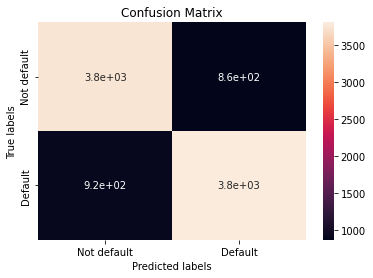

<Figure size 720x432 with 0 Axes>

In [67]:
confusion_plot(y_pred_knn_sm, y_test_sm)

In [71]:
y_score3 = classifier_knn.predict_proba(X_test_sm)[:,1]
false_positive_rate3, true_positive_rate3, threshold1 = roc_curve(y_test_sm, y_score3)

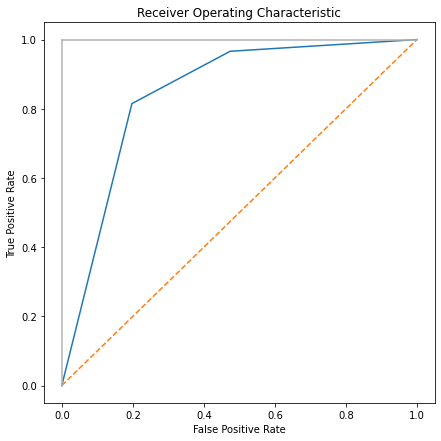

In [72]:
roc_plot(false_positive_rate3, true_positive_rate3)

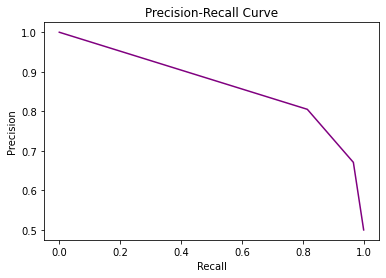

In [75]:
pr_curve(y_test_sm, y_score3)

# **DECISION TREE WITH SMOTE**

In [73]:
#importing the libraries
from sklearn. tree import DecisionTreeClassifier
dtc_sm=DecisionTreeClassifier()

In [74]:
# Choosing different depths
max_depth = [3,6,9,12]
 
# Choosing minimum number of samples
min_samples_split = [2,5,10,20,30]
 
# Choosing the min samples in leaf
min_samples_leaf = [1,4,8,16,24]
 
# Hyperparameters
parameters = {'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [76]:
#cross validation
classifier_dtc= HalvingGridSearchCV(dtc_sm,parameters,cv=5,scoring='r2',n_jobs=-1)

In [77]:
#fitting the data
classifier_dtc.fit(X_train_sm, y_train_sm)

HalvingGridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
                    param_grid={'max_depth': [3, 6, 9, 12],
                                'min_samples_leaf': [1, 4, 8, 16, 24],
                                'min_samples_split': [2, 5, 10, 20, 30]},
                    scoring='r2')

In [78]:
#predicting the data
y_pred_dtc_sm=classifier_dtc.predict(X_test_sm)

In [79]:
#evaluating the performance
performance_eval_test(y_pred_dtc_sm, y_test_sm)

The accuracy for testing data is 0.8232398887224481
The precision Score for testing data is 0.7170982238390755
The recall Score for testing data is 0.9103504482477588
The f1 Score for testing data is 0.8022504189609768
The roc score for testing data is 0.8384938472483278


The classification report is: 
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      5665
           1       0.72      0.91      0.80      3681

    accuracy                           0.82      9346
   macro avg       0.82      0.84      0.82      9346
weighted avg       0.85      0.82      0.83      9346



[[4343 1322]
 [ 330 3351]]


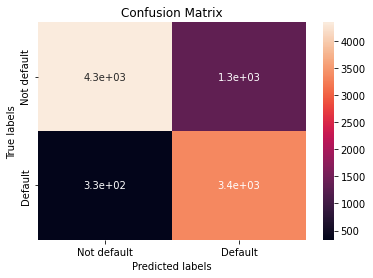

<Figure size 720x432 with 0 Axes>

In [80]:
confusion_plot(y_pred_dtc_sm, y_test_sm)

In [81]:
y_score4 = classifier_dtc.predict_proba(X_test_sm)[:,1]
false_positive_rate4, true_positive_rate4, threshold1 = roc_curve(y_test_sm, y_score4)

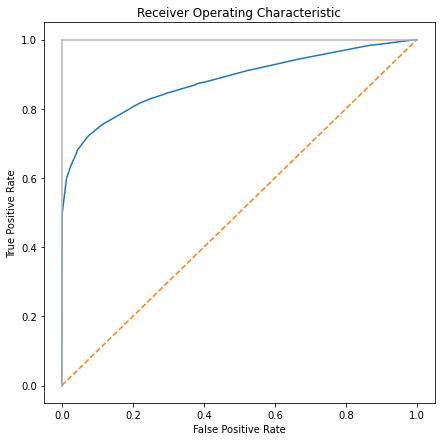

In [82]:
roc_plot(false_positive_rate4, true_positive_rate4)

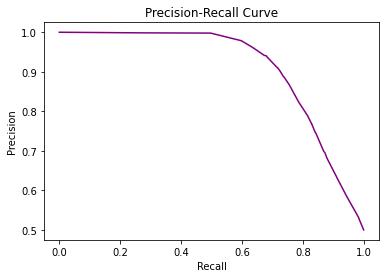

In [83]:
pr_curve(y_test_sm, y_score4)

In [87]:
best_params_dtc_sm= classifier_dtc.best_params_

In [89]:
best_params_dtc_sm

{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [92]:
#training the data using best parameters
dtree_best= DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=2)

In [93]:
#fitting the data using best parameters
dtree_best.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4)

In [94]:
explainer = shap.TreeExplainer(dtree_best)
shap_values = explainer.shap_values(X_sampled)

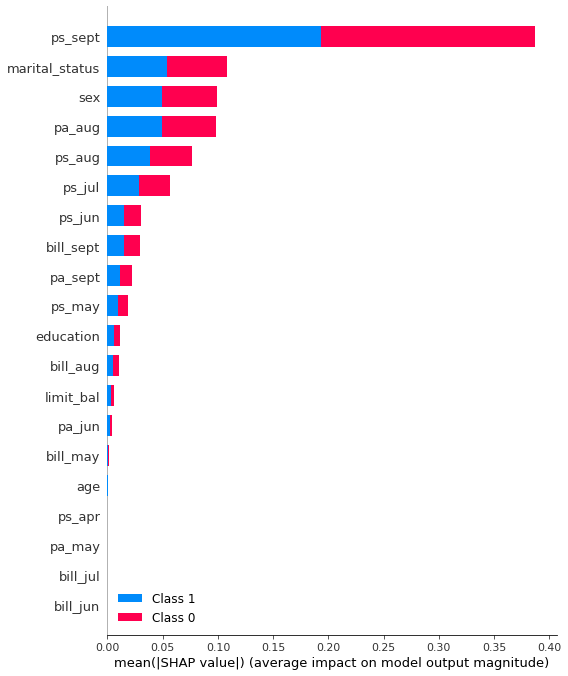

In [95]:
#feature importance
shap.summary_plot(shap_values, features=X_sampled, feature_names=X_sampled.columns, plot_type='bar')